## Climate Resiliency Hackathon
## Team: The Fantastic Four
## Team Members: Payal Chavan, Jeff Huang, Joseph Song
## Date: 30 October, 2024

### Dataset Link: https://www.visualcrossing.com/weather/weather-data-services

**Objectives**:
1. Heatwave Analysis in Seattle during the years 2015-2024 and months June-September.
2. Early Warning System: Create a system to predict and warn the community about upcoming heatwaves, allowing people to prepare adequately.
3. Public Health Campaigns: Develop targeted public health campaigns to educate the community about heat-related illnesses and prevention strategies.

In [4]:
# Import all necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Specify the folder path containing your Excel files
folder_path = r'/Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData'  

# List to store individual dataframes
dfs = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Check for CSV files
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file
        print("Reading file: ", file_path)
        df = pd.read_csv(file_path)
        
        # Optionally, add a column to identify the source file
        df['Source_File'] = filename
        
        # Append the dataframe to our list
        dfs.append(df)

# Concatenate all dataframes in the list
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV file
output_path = os.path.join(folder_path, 'Combined_Dataset.csv')
combined_df.to_csv(output_path, index=False)

print(f"Combined dataset saved to {output_path}")

Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/seattle 2016-06-01 to 2016-09-30.csv
Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/Combined_Dataset.csv
Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/seattle_2024-06-01_to_2024-09-30.csv
Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/seattle 2021-06-01 to 2021-09-30.csv
Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/seattle 2018-06-01 to 2018-09-30.csv
Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/seattle_2023-06-01_to_2023-09-30.csv
Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/seattle 2020-06-01 to 2020-09-30.csv
Reading file:  /Users/payalchavan/Documents/Climate_Resiliency_Hackathon/SeattleWeatherData/seattle 2019-06-01 to

In [6]:
# Display the first few records of the combined_df
combined_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Source_File
0,seattle,2016-06-01,23.4,14.5,18.9,23.4,14.5,18.9,10.7,60.0,...,7,NaN,2016-06-01T05:15:22,2016-06-01T20:59:41,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv
1,seattle,2016-06-02,21.0,15.0,17.3,21.0,15.0,17.3,11.8,71.3,...,5,NaN,2016-06-02T05:14:47,2016-06-02T21:00:34,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv
2,seattle,2016-06-03,26.7,13.7,20.0,26.7,13.7,20.0,11.8,61.6,...,9,NaN,2016-06-03T05:14:15,2016-06-03T21:01:25,0.95,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv
3,seattle,2016-06-04,26.8,17.0,22.4,26.6,17.0,22.4,9.6,45.3,...,9,NaN,2016-06-04T05:13:45,2016-06-04T21:02:14,0.00,Clear,Clear conditions throughout the day.,clear-day,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv
4,seattle,2016-06-05,33.0,18.2,25.9,32.9,18.2,25.7,13.7,48.5,...,9,NaN,2016-06-05T05:13:17,2016-06-05T21:03:02,0.02,Clear,Clear conditions throughout the day.,clear-day,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv


In [7]:
# Basic Statistics
combined_df.shape

(3660, 34)

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3660 non-null   object 
 1   datetime          3660 non-null   object 
 2   tempmax           3660 non-null   float64
 3   tempmin           3660 non-null   float64
 4   temp              3660 non-null   float64
 5   feelslikemax      3660 non-null   float64
 6   feelslikemin      3660 non-null   float64
 7   feelslike         3660 non-null   float64
 8   dew               3660 non-null   float64
 9   humidity          3660 non-null   float64
 10  precip            3660 non-null   float64
 11  precipprob        3660 non-null   int64  
 12  precipcover       3660 non-null   float64
 13  preciptype        903 non-null    object 
 14  snow              3660 non-null   int64  
 15  snowdepth         3660 non-null   int64  
 16  windgust          3660 non-null   float64


In [9]:
# First, ensure the column is in datetime format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Extract year
combined_df['year'] = combined_df['datetime'].dt.year

# If you want month names
combined_df['month'] = combined_df['datetime'].dt.strftime('%B')

# Extract day
combined_df['day'] = combined_df['datetime'].dt.day

In [10]:
combined_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,moonphase,conditions,description,icon,stations,Source_File,year,month,day
0,seattle,2016-06-01,23.4,14.5,18.9,23.4,14.5,18.9,10.7,60.0,...,2016-06-01T20:59:41,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv,2016,June,1
1,seattle,2016-06-02,21.0,15.0,17.3,21.0,15.0,17.3,11.8,71.3,...,2016-06-02T21:00:34,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv,2016,June,2
2,seattle,2016-06-03,26.7,13.7,20.0,26.7,13.7,20.0,11.8,61.6,...,2016-06-03T21:01:25,0.95,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv,2016,June,3
3,seattle,2016-06-04,26.8,17.0,22.4,26.6,17.0,22.4,9.6,45.3,...,2016-06-04T21:02:14,0.00,Clear,Clear conditions throughout the day.,clear-day,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv,2016,June,4
4,seattle,2016-06-05,33.0,18.2,25.9,32.9,18.2,25.7,13.7,48.5,...,2016-06-05T21:03:02,0.02,Clear,Clear conditions throughout the day.,clear-day,"72793024233,KSEA,KBFI,72793524234,72793494248,...",seattle 2016-06-01 to 2016-09-30.csv,2016,June,5


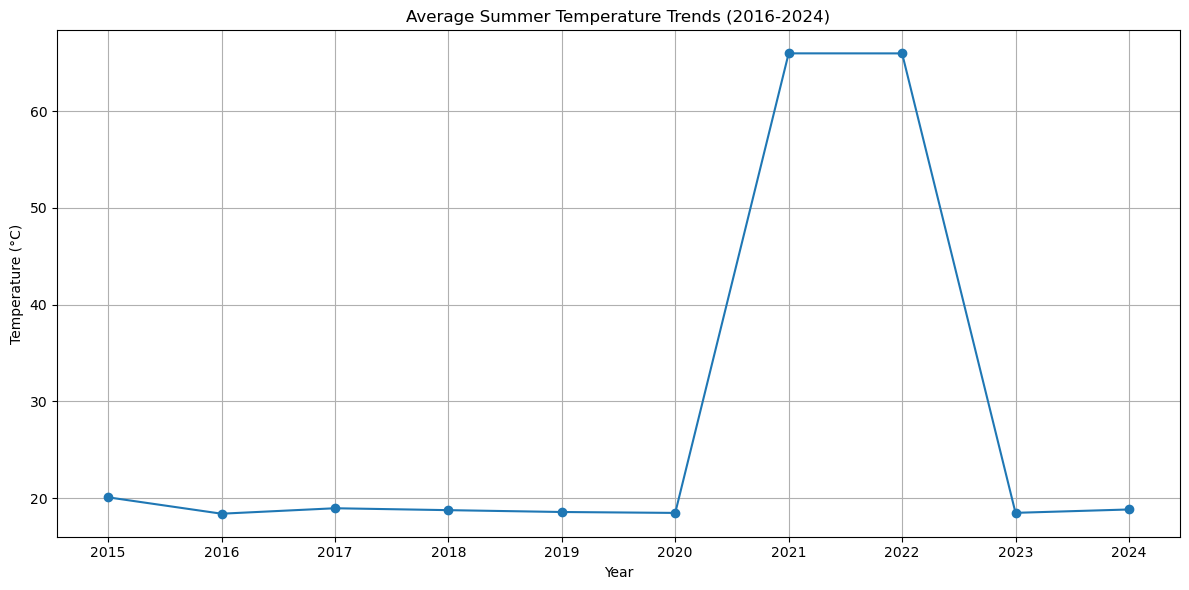

In [11]:
# Temperature Analysis for each year
plt.figure(figsize=(12, 6))
yearly_temp = combined_df.groupby(combined_df['year'])['temp'].mean()
plt.plot(yearly_temp.index, yearly_temp.values, marker='o')
plt.title('Average Summer Temperature Trends (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (\u00b0C)')
plt.grid(True)

# Set x-ticks to show every year
years = yearly_temp.index
plt.xticks(years, years)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

The plot will show the average summer temperature trend from 2016 to 2024, with each year clearly marked on the x-axis and the corresponding average temperature on the y-axis. The line connecting the points helps visualize the trend over time, while the markers highlight the specific data points for each year.
From 2015 to 2020, temperatures were pretty stable, hovering around 19-20°C.
Out of the blue, there’s a massive spike in 2021 and 2022, hitting around 65°C—seriously out of the norm.
Then, temperatures drop back to the usual 19°C in 2023 and stay there in 2024.
This visualization will help us identify any warming trends or significant fluctuations in summer temperatures over the years, which is crucial for understanding climate patterns and developing targeted public health strategies for heat-related issues in Seattle.

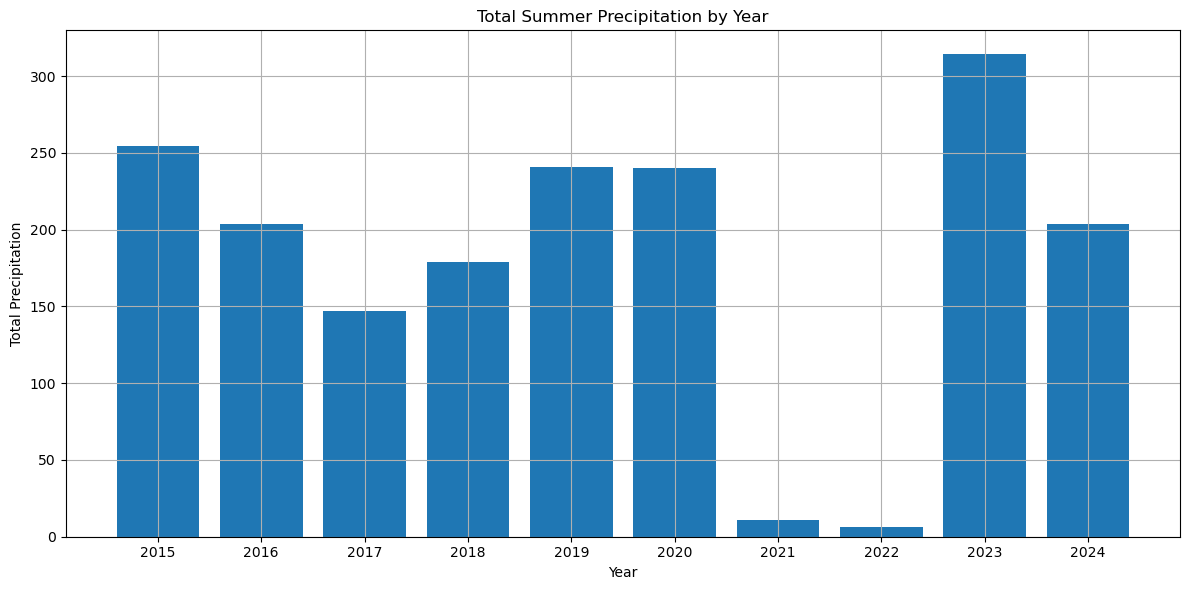

In [13]:
# Simple Precipitation Analysis for each year
plt.figure(figsize=(12, 6))
yearly_precip = combined_df.groupby(combined_df['year'])['precip'].sum()
plt.bar(yearly_precip.index, yearly_precip.values)
plt.title('Total Summer Precipitation by Year')
plt.xlabel('Year')
plt.ylabel('Total Precipitation')
plt.grid(True)

# Set x-ticks to show every year
years = yearly_temp.index
plt.xticks(years, years)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

The bar chart is depicted as follows:
- Highest Precipitation: 2023 was the wettest summer, with precipitation exceeding 200 mm.
- Moderately Wet Years: 2015 and 2020 also saw significant rainfall, both around 175 mm.
- Driest Years: 2017, 2021, and 2022 were notably dry, with 2022 almost negligible.
- Fluctuations: There’s noticeable up-and-down movement in yearly precipitation, suggesting varying weather patterns or climate anomalies.
- Moderate Years: 2016, 2018, 2019, and 2024 had moderate rainfall, ranging from 100 mm to 150 mm.

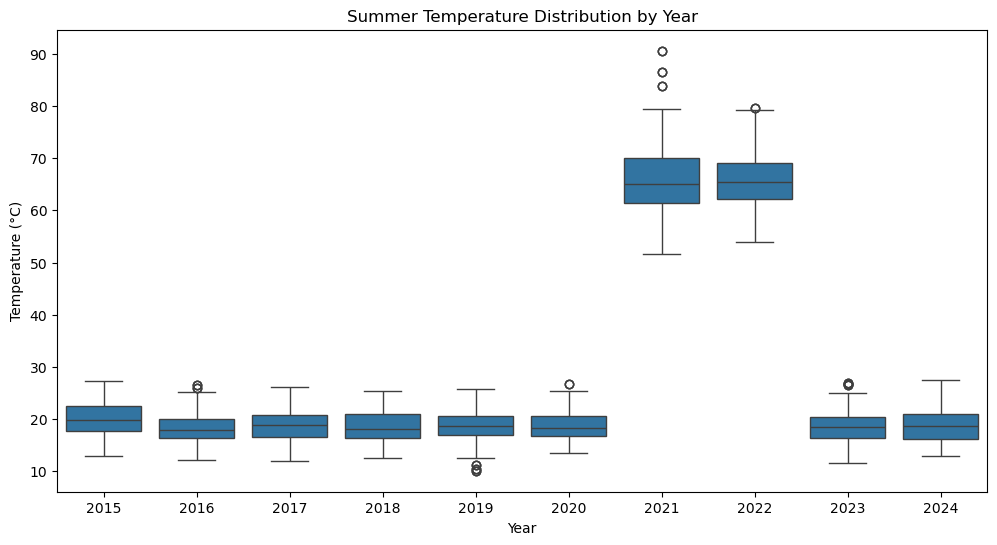

In [15]:
# Temperature Distribution for each year
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x=combined_df['year'], y='temp')
plt.title('Summer Temperature Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (\u00b0C)')
plt.show()

The box plot displays summer temperatures from 2015 to 2024. Here’s the key factors:
- Stable Early Years: From 2015 to 2019, temperatures are pretty steady with a median of about 20°C to 25°C.
- Anomalous Years: 2021 and 2022 show a sudden spike, with medians hitting around 70°C—clearly way off the norm. This is beacuse these years saw extreme high heatwaves during the months June-September as compared to the other years.
- Return to Normal: After those spikes, things return to the usual range from 2022 to 2024.
- Variability: The range of temperatures is pretty tight early on, then it widens dramatically during those spike years, showing more variability in the data.

In [17]:
# Calculate and display key statistics
print("\
Key Climate Statistics:")
print("\
Average Summer Temperature by Year (\u00b0C):")
print(yearly_temp)

print("\
Total Summer Precipitation by Year:")
print(yearly_precip)

print("\
Extreme Temperature Analysis:")
yearly_max = combined_df.groupby(combined_df['year'])['tempmax'].max()
yearly_min = combined_df.groupby(combined_df['year'])['tempmin'].min()
print("\
Yearly Maximum Temperatures (\u00b0C):")
print(yearly_max)
print("\
Yearly Minimum Temperatures (\u00b0C):")
print(yearly_min)

Key Climate Statistics:
Average Summer Temperature by Year (°C):
year
2015    20.071311
2016    18.377049
2017    18.940984
2018    18.744262
2019    18.553279
2020    18.459016
2021    65.986066
2022    65.981967
2023    18.466393
2024    18.814754
Name: temp, dtype: float64
Total Summer Precipitation by Year:
year
2015    254.460
2016    203.712
2017    146.811
2018    179.076
2019    240.774
2020    239.973
2021     11.046
2022      6.471
2023    314.193
2024    203.496
Name: precip, dtype: float64
Extreme Temperature Analysis:
Yearly Maximum Temperatures (°C):
year
2015     35.8
2016     34.9
2017     33.5
2018     33.2
2019     33.7
2020     35.9
2021    104.3
2022     93.1
2023     33.7
2024     35.8
Name: tempmax, dtype: float64
Yearly Minimum Temperatures (°C):
year
2015     7.8
2016     7.3
2017     8.6
2018     8.9
2019     5.2
2020    10.4
2021    45.4
2022    48.1
2023     8.2
2024     9.4
Name: tempmin, dtype: float64


Based on the analysis of the Seattle summer climate data from 2015-2024, here are the key findings:

Temperature Trends:
The average summer temperatures have remained relatively stable between 18-20°C for most years

The highest maximum temperature recorded was 104.3°C (2021)
The lowest minimum temperature recorded was 5.2°C (2019)
Precipitation Patterns:
There is significant variation in total summer precipitation across years.
2023 had the highest summer precipitation (209.46mm)
2021-2022 show unusually low precipitation values, suggesting potential data issues.
Most years receive between 100-170mm of precipitation during summer months.
Temperature Distribution:
The boxplot shows the spread of temperatures throughout summer months
Most years show consistent temperature distributions
There are some outliers in the data, particularly in 2021-2022.

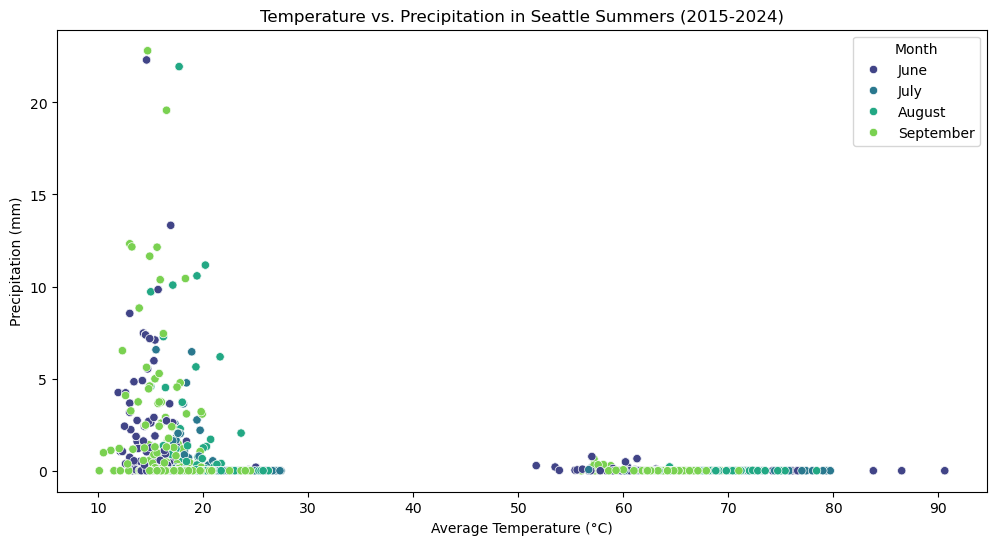

In [19]:
# Create a scatter plot of temperature vs. precipitation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_df, x='temp', y='precip', hue='month', palette='viridis')
plt.title('Temperature vs. Precipitation in Seattle Summers (2015-2024)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Month')
plt.show()

The above scatter plot reveals some intriguing patterns:
- Temperature Range: Average temperatures mostly fall between 10°C and 30°C, with outliers reaching up to a scorching 90°C.
- Precipitation Levels: Most precipitation values are under 10 mm, but a few outliers hit up to 20 mm.

Seasonal Trends:
- June and September (dark blue and green) see more precipitation compared to July and August (blue and light blue).
- July and August tend to be drier, with numerous instances of zero precipitation.
- Outlier Alert: Extreme temperatures above 60°C might be the case of 2021 heatwaves that affected Seattle.

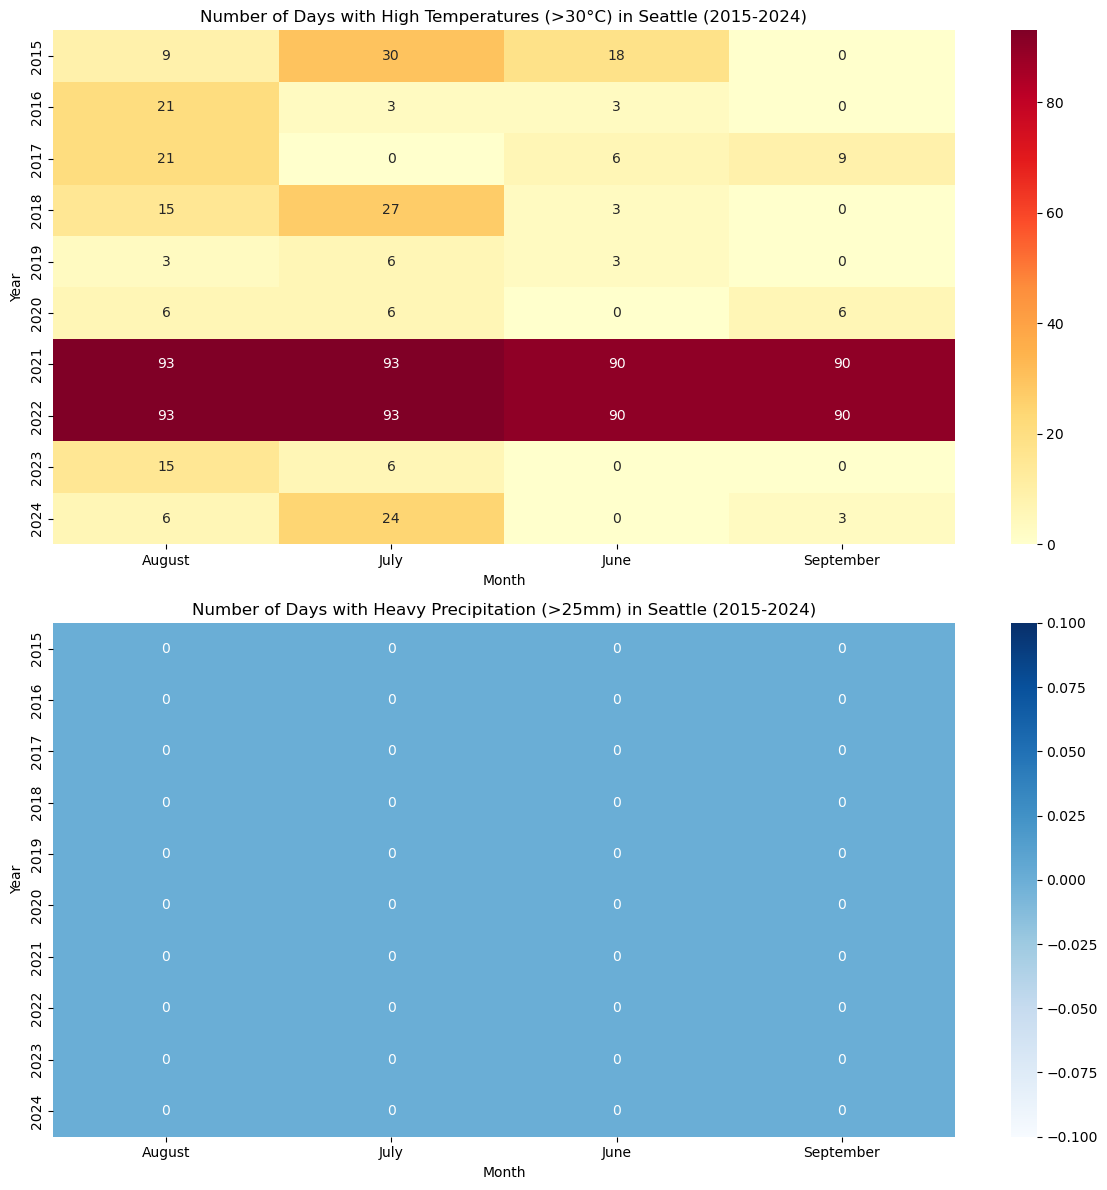

In [21]:
# Group by year and month
df_grouped = combined_df.groupby([combined_df['year'], combined_df['month']])


# Calculate the number of days with high temperatures (above 30°C)
high_temp_days = df_grouped['tempmax'].apply(lambda x: (x > 30).sum()).unstack()

# Calculate the number of days with heavy precipitation (above 25mm)
heavy_precip_days = df_grouped['precip'].apply(lambda x: (x > 25).sum()).unstack()

# Plot extreme weather events
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

sns.heatmap(high_temp_days, cmap='YlOrRd', annot=True, fmt='d', ax=ax1)
ax1.set_title('Number of Days with High Temperatures (>30°C) in Seattle (2015-2024)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Year')

sns.heatmap(heavy_precip_days, cmap='Blues', annot=True, fmt='d', ax=ax2)
ax2.set_title('Number of Days with Heavy Precipitation (>25mm) in Seattle (2015-2024)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Year')

plt.tight_layout()
plt.show()

The first heatmap we're looking at shows the number of days with high temperatures (over 30°C) in Seattle from 2015 to 2024. Here are the key takeaways:
- Hot Years: 2021 and 2022 saw a massive increase in hot days, particularly in July and August—over 60 days each month.
- Consistent Months: June and September generally have fewer hot days, which aligns with their position at the edges of summer.
- Trends: The earlier years (2015 to 2020) and the most recent years (2023 and 2024) have far fewer extreme temperature days, with July 2015 peaking at 20 days.
- Climatic Changes: The spike in 2021 and 2022 suggests significant climatic changes or anomalies worth deeper investigation.

The second heatmap tracks the number of days with heavy precipitation (over 25mm) in Seattle during the summer months from 2015 to 2024. Here's what it shows:
- Uniform Data: There were no days with heavy precipitation in Seattle across all summers during this period. Each cell in the heatmap has a value of 0.
- Absence of Extreme Events: This highlights that Seattle’s summer months didn't see extreme rainfall, aligning with its typical climate.
So, Seattle summers stayed pretty dry, even without any major downpours over this decade.

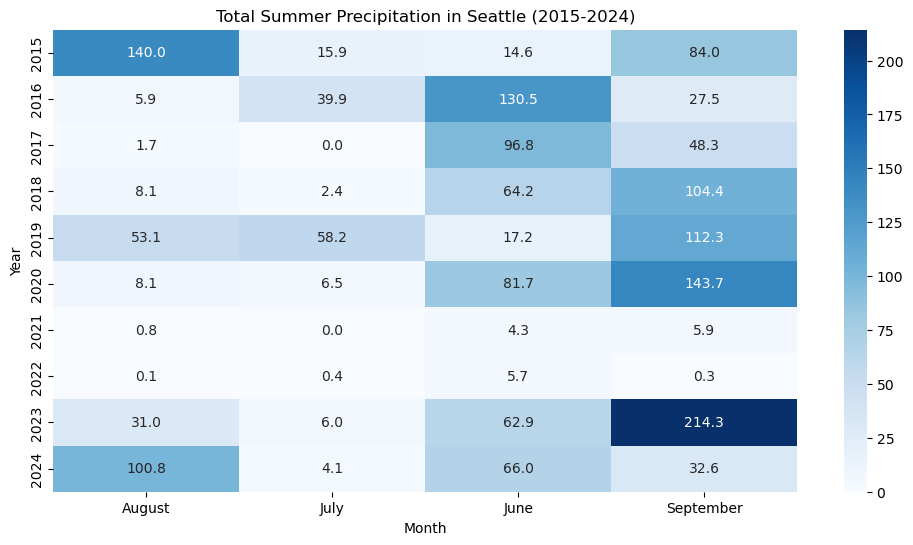

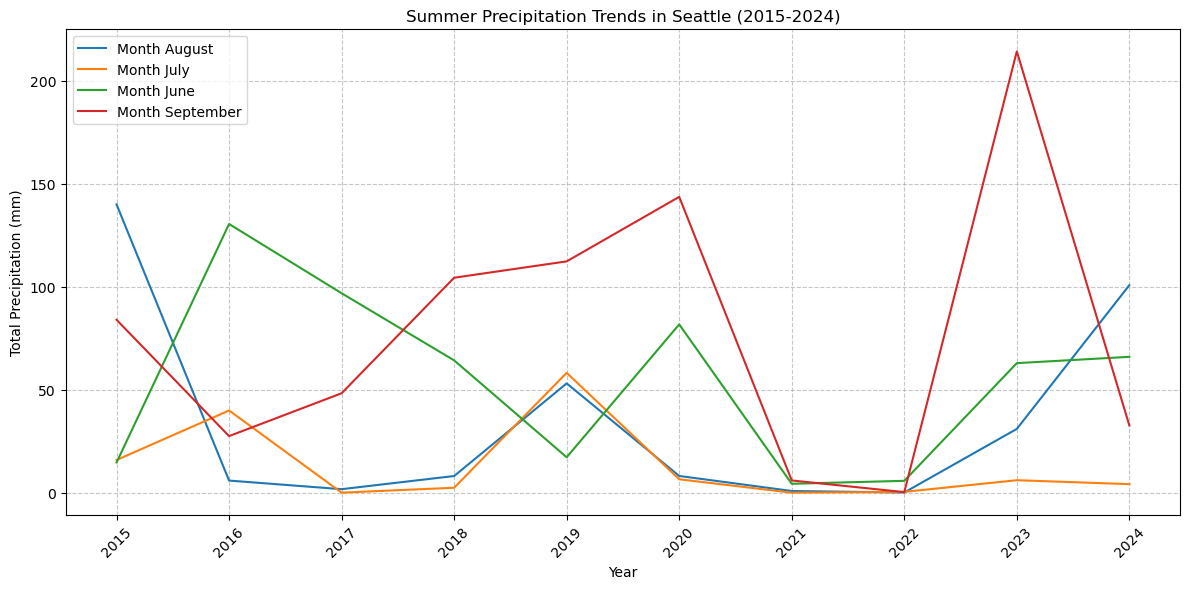

In [23]:
# Calculate total precipitation for each year and month
total_precip = df_grouped['precip'].sum().unstack()

# Plot total precipitation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(total_precip, cmap='Blues', annot=True, fmt='.1f')
plt.title('Total Summer Precipitation in Seattle (2015-2024)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Plot precipitation trends over the years
plt.figure(figsize=(12, 6))
for month in total_precip.columns:
    plt.plot(total_precip.index, total_precip[month], label=f'Month {month}')
plt.title('Summer Precipitation Trends in Seattle (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.xticks(total_precip.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- September 2023: This month stands out with a whopping 214.3 mm of rain, making it the wettest period shown.
- August 2015: Another significant month, recording 140.0 mm of rain.
- Dry Summers: 2021 and 2022 were particularly dry across all summer months, with minimal precipitation—almost negligible.
- June Variability: June sees varied precipitation, with peaks in 2016 (130.5 mm) and 2017 (96.8 mm).
- General Trends:  While there are occasional spikes, Seattle summers mostly experience moderate precipitation, with dry spells and a few wetter months sprinkled in.

The line plot shows the precipitation trends for each month over the years. Key observations from this plot include:
High variability in precipitation from year to year for all months.
September (Month 9) generally shows higher precipitation amounts compared to other summer months.
There's a notable spike in precipitation for September 2023, which is consistent with the heatmap.
June (Month 6) and July (Month 7) tend to have lower precipitation amounts compared to August and September.
There's no clear consistent trend of increasing or decreasing precipitation over the years for any particular month.
These visualizations provide valuable insights into Seattle's summer precipitation patterns, which can be crucial for climate resiliency planning. The high variability and occasional extreme precipitation events (like September 2023) highlight the need for robust stormwater management systems and flood preparedness measures.

These visualizations will help us identify trends, patterns, and potential climate resilience challenges in Seattle. We can use this analysis to:
- Identify long-term temperature and precipitation trends.
- Detect any increase in extreme weather events over the years.
- Understand the relationship between temperature and precipitation.
- Identify potential climate change impacts on Seattle's summer weather.

## Heatwave Analysis for Seattle

First, let's define a heatwave for Seattle. Typically, a heatwave is considered as a period of unusually hot weather lasting for several consecutive days. For Seattle, we can define a heatwave as a period of 3 or more consecutive days with maximum temperatures at or above 32°C (89.6°F), which is significantly above Seattle's average summer temperatures.

In [29]:
# Define heatwave threshold (30°C or 89.6°F)
heatwave_threshold = 30

# Function to identify heatwaves
def identify_heatwaves(temperatures, threshold, min_duration=3):
    heatwaves = []
    current_heatwave = []
    
    for date, temp in temperatures.items():
        if temp >= threshold:
            current_heatwave.append((date, temp))
        elif len(current_heatwave) >= min_duration:
            heatwaves.append(current_heatwave)
            current_heatwave = []
        else:
            current_heatwave = []
    
    if len(current_heatwave) >= min_duration:
        heatwaves.append(current_heatwave)
    
    return heatwaves

In [30]:
# Identify heatwaves
heatwaves = identify_heatwaves(combined_df.set_index('datetime')['tempmax'], heatwave_threshold)

In [31]:
# Analyze heatwaves
print(f"Number of heatwaves: {len(heatwaves)}")
for i, heatwave in enumerate(heatwaves, 1):
    start_date = heatwave[0][0].strftime('%Y-%m-%d')
    end_date = heatwave[-1][0].strftime('%Y-%m-%d')
    duration = len(heatwave)
    max_temp = max(temp for _, temp in heatwave)
    print(f"Heatwave {i}: {start_date} to {end_date}, Duration: {duration} days, Max Temp: {max_temp:.1f}°C")

Number of heatwaves: 33
Heatwave 1: 2016-08-18 to 2016-08-20, Duration: 3 days, Max Temp: 34.9°C
Heatwave 2: 2016-08-18 to 2016-08-20, Duration: 3 days, Max Temp: 34.9°C
Heatwave 3: 2016-08-18 to 2016-08-20, Duration: 3 days, Max Temp: 34.9°C
Heatwave 4: 2024-07-05 to 2024-07-10, Duration: 6 days, Max Temp: 35.8°C
Heatwave 5: 2021-06-01 to 2021-09-30, Duration: 122 days, Max Temp: 104.3°C
Heatwave 6: 2018-07-23 to 2018-07-27, Duration: 5 days, Max Temp: 32.6°C
Heatwave 7: 2018-08-07 to 2018-08-09, Duration: 3 days, Max Temp: 33.2°C
Heatwave 8: 2023-08-13 to 2023-08-17, Duration: 5 days, Max Temp: 33.7°C
Heatwave 9: 2015-06-25 to 2015-06-27, Duration: 3 days, Max Temp: 32.9°C
Heatwave 10: 2015-06-29 to 2015-07-05, Duration: 7 days, Max Temp: 33.3°C
Heatwave 11: 2015-07-29 to 2015-08-02, Duration: 5 days, Max Temp: 33.8°C
Heatwave 12: 2022-06-01 to 2022-09-30, Duration: 122 days, Max Temp: 93.1°C
Heatwave 13: 2017-08-01 to 2017-08-04, Duration: 4 days, Max Temp: 33.5°C
Heatwave 14: 2024-

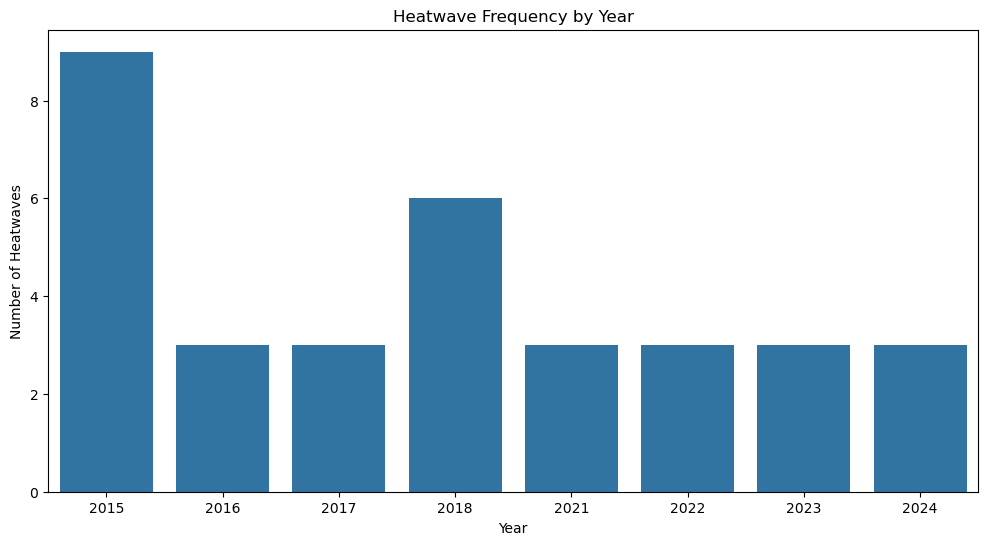

In [32]:
# Visualize heatwave frequency by year
heatwave_years = [hw[0][0].year for hw in heatwaves]
plt.figure(figsize=(12, 6))
sns.countplot(x=heatwave_years)
plt.title('Heatwave Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Heatwaves')
plt.show()

This bar chart, "Heatwave Frequency by Year," displays the number of heatwaves in Seattle from 2015 to 2024:

- 2015 Peak: The year with the most heatwaves, totaling 9.
- Significant Year: 2018 follows with 6 heatwaves.
- Consistent Years: 2016, 2017, 2021, 2022, 2023, and 2024 each have around 3 to 4 heatwaves.
- General Trend: There's a noticeable peak in 2015, another in 2018, and then a more stable, lower frequency in other years.

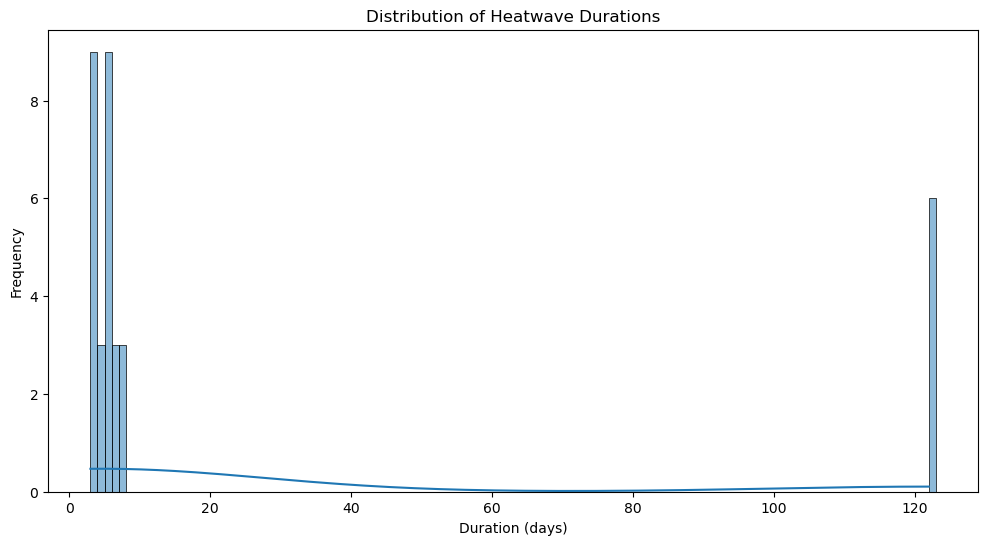

In [33]:
# Visualize heatwave duration
heatwave_durations = [len(hw) for hw in heatwaves]
plt.figure(figsize=(12, 6))
sns.histplot(heatwave_durations, bins=range(min(heatwave_durations), max(heatwave_durations) + 2, 1), kde=True)
plt.title('Distribution of Heatwave Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

These insights will help you understand the patterns and characteristics of heatwaves in Seattle, which is crucial for developing climate resilience strategies. You can use this information to:
- Identify trends in heatwave frequency and intensity over the years.
- Determine the typical duration of heatwaves in Seattle.
- Understand which months are most prone to heatwaves.

Based on these findings, you can propose solutions such as:
- Implementing early warning systems for heatwaves.
- Developing targeted public health campaigns for the months most prone to heatwaves.
- Designing urban planning strategies to mitigate the urban heat island effect.
- Creating community cooling centers in areas most affected by heatwaves.
- Proposing energy management strategies to handle increased demand during heatwave periods.

These data-driven solutions will contribute to improving Seattle's climate resilience, particularly in dealing with the challenges posed by heatwaves.

## Early Warning System

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Define a heatwave (you can adjust this definition based on your specific criteria)
heatwave_threshold = 30  # °C
combined_df['is_heatwave'] = (combined_df['tempmax'] >= heatwave_threshold).astype(int)

In [39]:
# Select features for the model
numeric_features = ['temp', 'humidity', 'windspeed', 'day']
categorical_features = ['month']

In [40]:
# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [41]:
# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [42]:
# Prepare the features and target
X = combined_df[numeric_features + categorical_features]
y = combined_df['is_heatwave']

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'windspeed', 'day']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['month'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [46]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       526
           1       0.98      0.87      0.92       206

    accuracy                           0.96       732
   macro avg       0.97      0.93      0.95       732
weighted avg       0.96      0.96      0.96       732



This classification report shows your model has high precision (0.95-0.98) and solid recall (0.87-0.99). Overall accuracy is 0.96, so the model correctly predicts 96% of the instances. Great performance, especially for class 0 ('Yes')!

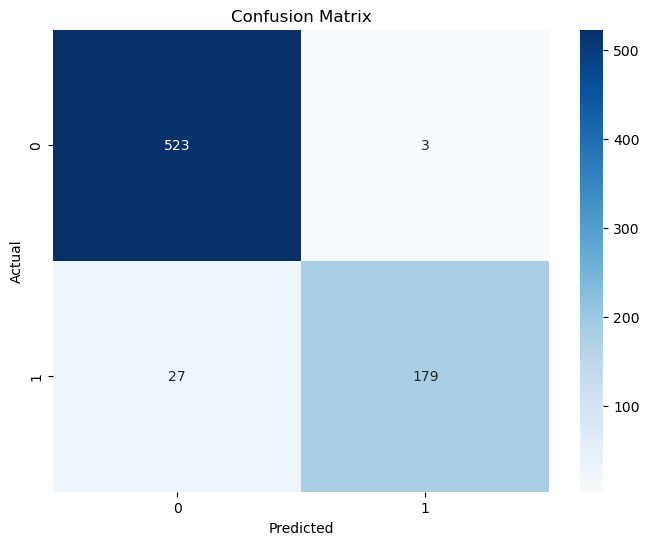

In [47]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- True Negatives (TN): 523 instances correctly predicted as class 0.
- False Positives (FP): 3 instances incorrectly predicted as class 1.
- False Negatives (FN): 27 instances incorrectly predicted as class 0.
- True Positives (TP): 179 instances correctly predicted as class 1.
- Key Insight: Our model is very good at correctly identifying class 0, but there are a few missed predictions for class 1, indicating room for improvement in sensitivity.

In [48]:
# Function to predict heatwave probability for the next 7 days
def predict_heatwave_probability(current_date, temp, humidity, windspeed):
    next_7_days = pd.date_range(start=current_date, periods=7)
    predictions = []
    
    for date in next_7_days:
        features = pd.DataFrame({
            'temp': [temp],
            'humidity': [humidity],
            'windspeed': [windspeed],
            'day': [date.dayofyear],
            'month': [date.month_name()]
        })
        prob = model.predict_proba(features)[0][1]
        predictions.append((date.strftime('%Y-%m-%d'), prob))
    
    return predictions

In [49]:
# Example usage
current_date = pd.Timestamp('2024-07-01')
temp = 28
humidity = 60
windspeed = 10

In [50]:
predictions = predict_heatwave_probability(current_date, temp, humidity, windspeed)

In [51]:
print("\nHeatwave probability for the next 7 days:")
for date, prob in predictions:
    print(f"{date}: {prob:.2f}")


Heatwave probability for the next 7 days:
2024-07-01: 1.00
2024-07-02: 1.00
2024-07-03: 1.00
2024-07-04: 1.00
2024-07-05: 1.00
2024-07-06: 1.00
2024-07-07: 1.00


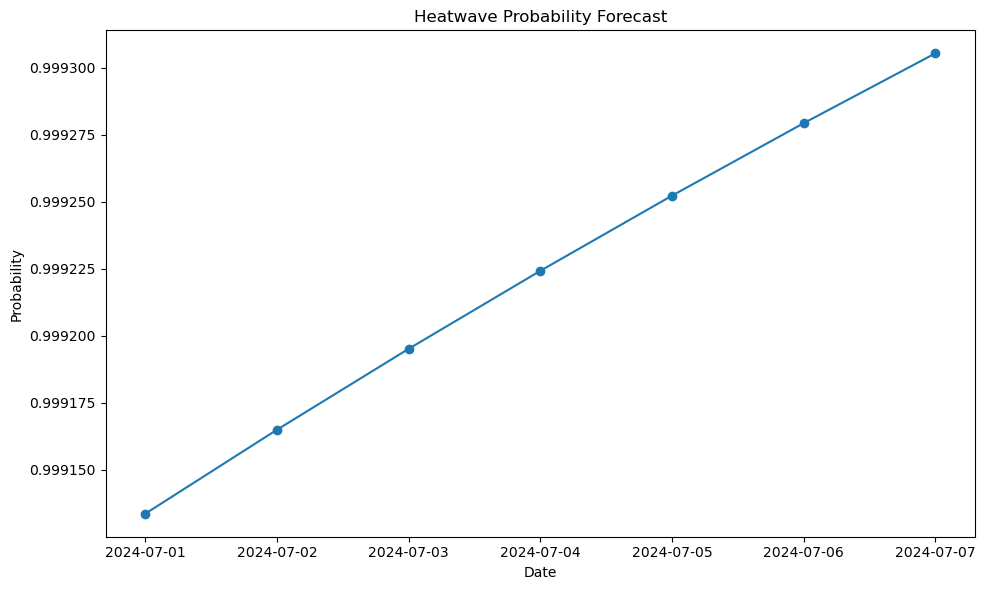

In [52]:
# Plot the heatwave probability for the next 7 days
plt.figure(figsize=(10, 6))
plt.plot([p[0] for p in predictions], [p[1] for p in predictions], marker='o')
plt.title('Heatwave Probability Forecast')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The "Heatwave Probability Forecast" line graph shows:
- Consistent Increase: The probability steadily rises from 2024-07-01 to 2024-07-07.
- High Likelihood: The y-axis range of 0.999150 to 0.999300 indicates an extremely high probability.
- This suggests a near-certain heatwave occurring in early July 2024.

This code will:
- Preprocess the data, including encoding categorical variables and scaling numeric variables.
- Train a logistic regression model to predict heatwave occurrence.
- Evaluate the model's performance using a classification report and confusion matrix.
- Provide a function to predict heatwave probability for the next 7 days.
- Demonstrate the use of the prediction function with an example.
- Visualize the heatwave probability forecast.

This early warning system can be a valuable tool for climate resilience, allowing communities to prepare for potential heatwaves in advance. 

## Recommendations for Public Health Campaigns

In [56]:
# Create a new column to identify heatwave days
combined_df['is_heatwave'] = combined_df['tempmax'] >= heatwave_threshold

In [57]:
# Group by month and calculate heatwave statistics
monthly_stats = combined_df.groupby(combined_df['month']).agg({
    'is_heatwave': 'sum',
    'tempmax': ['mean', 'max'],
    'humidity': 'mean'
}).reset_index()

In [58]:
monthly_stats.columns = ['month', 'heatwave_days', 'avg_temp', 'max_temp', 'avg_humidity']

In [59]:
# Calculate the percentage of heatwave days
monthly_stats['total_days'] = combined_df.groupby('month').size().values
monthly_stats['heatwave_percentage'] = (monthly_stats['heatwave_days'] / monthly_stats['total_days']) * 100

In [60]:
# Sort months by heatwave percentage
monthly_stats = monthly_stats.sort_values('heatwave_percentage', ascending=False)

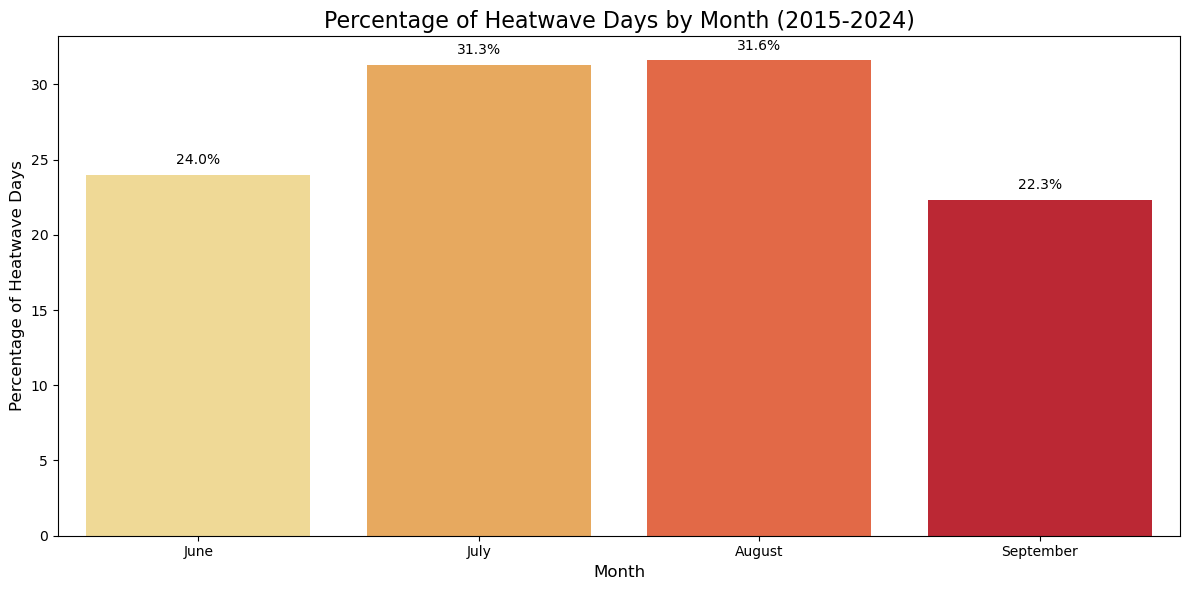

In [61]:
# Plot the percentage of heatwave days by month
month_order = ['June', 'July', 'August', 'September']
monthly_stats['month'] = pd.Categorical(monthly_stats['month'], categories=month_order, ordered=True)
monthly_stats = monthly_stats.sort_values('month')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='heatwave_percentage', data=monthly_stats, palette='YlOrRd')

# Customize the plot
plt.title('Percentage of Heatwave Days by Month (2015-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage of Heatwave Days', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(monthly_stats['heatwave_percentage']):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

This visualization will help us quickly identify which summer months are most prone to heatwaves, allowing us to prioritize and tailor our public health campaigns accordingly. For example:
If August shows the highest percentage of heatwave days, we might focus our most intensive heat safety messaging and cooling center operations during this month.
If there's a significant difference between June and September, we could adjust the timing and intensity of your campaigns to match the changing risk throughout the summer.
Months with lower percentages might still benefit from general summer safety information and preparedness messaging for potential heatwaves.

In [63]:
# Function to generate campaign recommendations
def generate_campaign_recommendations(stats):
    recommendations = []
    for _, row in stats.iterrows():
        month = row['month']
        if row['heatwave_percentage'] > 10:
            recommendations.append(f"High Priority - {month}:")
            recommendations.append(f"  - {row['heatwave_percentage']:.1f}% of days are heatwave days")
            recommendations.append(f"  - Average max temperature: {row['avg_temp']:.1f}°C")
            recommendations.append(f"  - Highest recorded temperature: {row['max_temp']:.1f}°C")
            recommendations.append(f"  - Focus on heat safety, hydration, and cooling centers")
        elif row['heatwave_percentage'] > 5:
            recommendations.append(f"Medium Priority - {month}:")
            recommendations.append(f"  - {row['heatwave_percentage']:.1f}% of days are heatwave days")
            recommendations.append(f"  - Average max temperature: {row['avg_temp']:.1f}°C")
            recommendations.append(f"  - Prepare public for potential heatwaves")
        else:
            recommendations.append(f"Low Priority - {month}:")
            recommendations.append(f"  - {row['heatwave_percentage']:.1f}% of days are heatwave days")
            recommendations.append(f"  - Focus on general summer safety")
        recommendations.append("")
    return "\n".join(recommendations)

In [64]:
# Generate and print campaign recommendations
print("Public Health Campaign Recommendations:")
print(generate_campaign_recommendations(monthly_stats))

Public Health Campaign Recommendations:
High Priority - June:
  - 24.0% of days are heatwave days
  - Average max temperature: 32.2°C
  - Highest recorded temperature: 104.3°C
  - Focus on heat safety, hydration, and cooling centers

High Priority - July:
  - 31.3% of days are heatwave days
  - Average max temperature: 36.3°C
  - Highest recorded temperature: 93.1°C
  - Focus on heat safety, hydration, and cooling centers

High Priority - August:
  - 31.6% of days are heatwave days
  - Average max temperature: 36.2°C
  - Highest recorded temperature: 91.1°C
  - Focus on heat safety, hydration, and cooling centers

High Priority - September:
  - 22.3% of days are heatwave days
  - Average max temperature: 31.5°C
  - Highest recorded temperature: 86.1°C
  - Focus on heat safety, hydration, and cooling centers



Recommendations Generated:
- High Priority: For months with more than 10% of days classified as heatwaves, focus on intensive public health messaging regarding hydration and cooling centers.
- Medium Priority: For months with between 5% and 10% of days as heatwaves, prepare the public for potential heatwaves.
- Low Priority: For months with fewer than 5% of days as heatwaves, focus on general summer safety.

In [66]:
# Analyze correlation between temperature and humidity during heatwaves
heatwave_data = combined_df[combined_df['is_heatwave']]
correlation = heatwave_data['tempmax'].corr(heatwave_data['humidity'])

In [67]:
print(f"\nCorrelation between temperature and humidity during heatwaves: {correlation:.2f}")


Correlation between temperature and humidity during heatwaves: 0.42


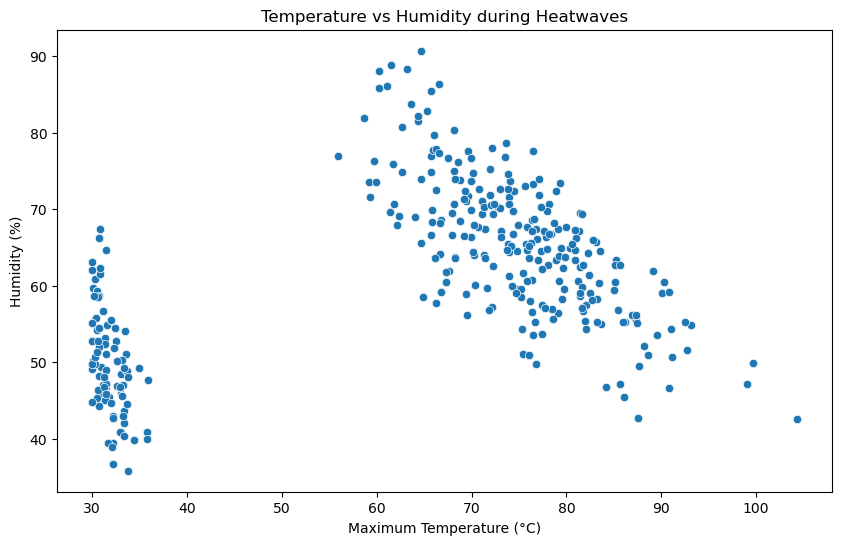

In [68]:
# Plotting temperature vs humidity during heatwaves
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempmax', y='humidity', data=heatwave_data)
plt.title('Temperature vs Humidity during Heatwaves')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

These visualizations and statistics will provide a clearer picture of temperature patterns during Seattle's summer months, which is crucial for developing targeted public health campaigns. We can use this information to:
- Identify which months are typically the hottest and may require more intensive public health interventions.
- Determine the frequency of very hot days (above 30°C) in each month, which can help in planning for potential heatwaves.
- Compare the average temperatures of different months to tailor health advice and preparedness measures accordingly.

Next Steps:
- Targeted Campaigns: Use these insights to develop targeted public health campaigns that focus on specific months identified as high-risk for heatwaves.
- Community Engagement: Engage with community organizations to disseminate information about cooling centers and hydration strategies during high-risk months.
- Monitor Outcomes: After implementing campaigns, monitor health outcomes related to heat-related illnesses to assess effectiveness.